In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv("../WineAnalysis/WineQT.csv")

# Datapunkter och antal kolumner

In [3]:
print(len(data))
print(data.shape)

1143
(1143, 13)


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Distributionen
Vi plottar distributionen med hjälp av histogram. Vi avstår även från att använda ID attributet, då det helt enkelt inte är användbart. "quality" histogrammet visar att det finns 6 klasser av kvalitet: 3, 4, 5, 6, 7 och 8.

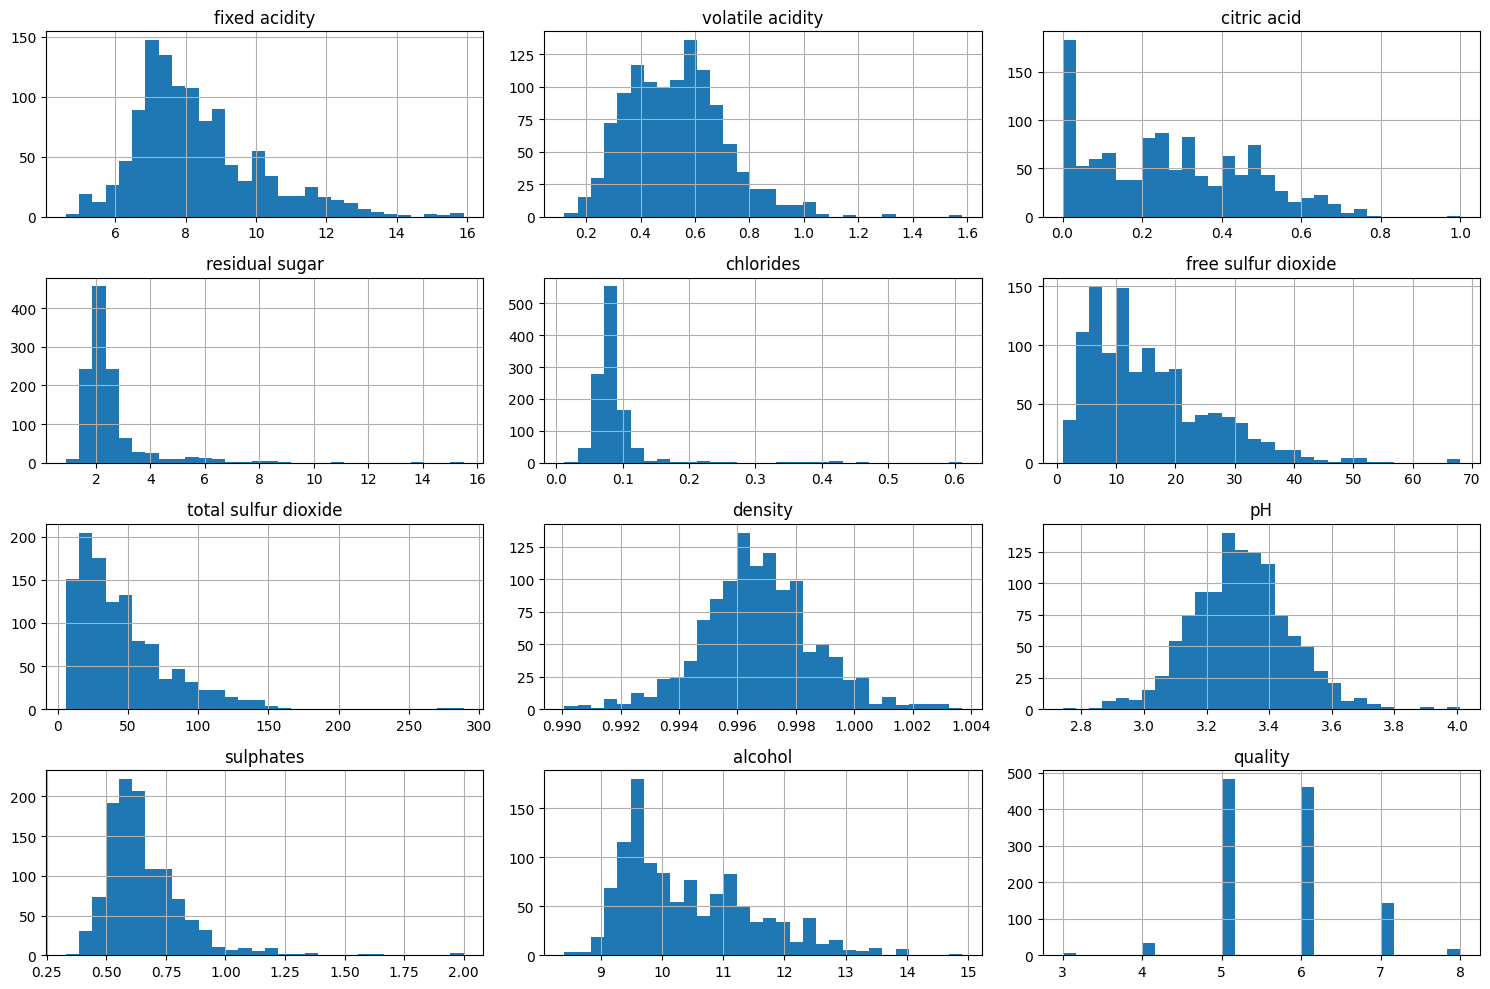

In [5]:
desired_attrs = data.iloc[:, :12]
desired_attrs.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Dela datan i ett testset och ett träningsset

In [16]:
data_x = data.iloc[:, :11]
data_y = data["quality"]
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Träna modellen med träningsdatasetet

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
plt.show() # Plotta inget här

# Vad får vi för test score?

In [18]:
y_pred = dtree.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print(f'test_score = {test_score:.2f}')

test_score = 0.64


# Info om vårat beslutsträd

In [19]:
dtree_info = dtree.tree_

In [20]:
# Hur djupt är träder? Vad är alltså den längsta möjliga vägen från roten till ett blad?
depth = dtree_info.max_depth
print("depth = ", depth)

depth =  17


In [21]:
# Hur många löv (slutpunkter) har trädet? Det finns många löv, men utfallet kan bara vara 3, 4, 5, 6, 7 eller 8 som sagt.
print(f"Antal möjliga utfall: {dtree_info.max_n_classes}, antal slutpunkter: {dtree_info.n_leaves}")

Antal möjliga utfall: 6, antal slutpunkter: 255


# Attributens vikt
Vilka har störst påverkan?

In [22]:
feature_importances = dtree.feature_importances_
feature_names = x_train.columns
for name, value in zip(feature_names, feature_importances):
    print(f"{name}: {value:.2f}")

fixed acidity: 0.05
volatile acidity: 0.09
citric acid: 0.09
residual sugar: 0.06
chlorides: 0.08
free sulfur dioxide: 0.05
total sulfur dioxide: 0.09
density: 0.07
pH: 0.11
sulphates: 0.13
alcohol: 0.18
